# Normal Equation

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import time 
from sklearn.datasets import load_boston
from matplotlib import cm
import seaborn as sns
import MachineLearning as ml

In [2]:
boston_dataset = load_boston()

/usr/local/Caskroom/miniconda/base/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Californ

In [3]:
dataFrame = pd.DataFrame(boston_dataset.data, columns = boston_dataset.feature_names)

In [4]:
dataFrame['MEDV'] = boston_dataset.target

In [5]:
dataFrame

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [6]:
feature_name = 'RM'
X = dataFrame[[feature_name]]
Y = dataFrame[['MEDV']]

# Normal Equation definition

$$\large \theta = (X^TX)^{-1}X^TY$$

In [7]:
A = np.array([[1,2,3], [2,4,6], [0, 5, 7]])
prod = A.T.dot(A)

In [8]:
#error singular matrix
#np.linalg.inv(A)
#use the pseudo-inverse
np.linalg.pinv(A)

array([[ 0.19733333,  0.39466667, -0.41333333],
       [-0.01866667, -0.03733333,  0.10666667],
       [ 0.01333333,  0.02666667,  0.06666667]])

In [9]:
def normal_equation(X,Y):
    elapsing_time = 0
    elapsing_time -= time.time()
    
    theta = np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(Y)
    
    elapsing_time += time.time()
     
    return theta, elapsing_time

   # Fitting several polynomial models of different degree by means of Normal Equation

In [10]:
X_int = np.c_[np.ones((X.shape[0],1)),X]

In [11]:
theta_linear, _ = normal_equation(X_int,Y)

In [12]:
theta_linear

array([[-34.67062078],
       [  9.10210898]])

# Fit several polynomial hypotheses through the Normal Equation

In [13]:
def polinomyal_features(dataFrame, degree, column):
    
    new_dataFrame = dataFrame.copy()
    for i in range(1,degree):
        column_name = '('+column + ')**{}'.format(i+1)
        new_dataFrame[column_name] = dataFrame[column]**(i+1)

    return new_dataFrame

In [14]:
X_poly_2 = polinomyal_features(X, 2,feature_name);
X_poly_3 = polinomyal_features(X, 3,feature_name);
X_poly_4 = polinomyal_features(X, 4,feature_name);
X_poly_5 = polinomyal_features(X, 5,feature_name);
X_poly_6 = polinomyal_features(X, 6,feature_name);
X_poly_7 = polinomyal_features(X, 7,feature_name);
X_poly_8 = polinomyal_features(X, 8,feature_name);

In [15]:
X_poly_2_int = np.c_[np.ones((X_poly_2.shape[0],1)), X_poly_2]
X_poly_3_int = np.c_[np.ones((X_poly_3.shape[0],1)), X_poly_3]
X_poly_4_int = np.c_[np.ones((X_poly_4.shape[0],1)), X_poly_4]
X_poly_5_int = np.c_[np.ones((X_poly_5.shape[0],1)), X_poly_5]
X_poly_6_int = np.c_[np.ones((X_poly_6.shape[0],1)), X_poly_6]
X_poly_7_int = np.c_[np.ones((X_poly_7.shape[0],1)), X_poly_7]
X_poly_8_int = np.c_[np.ones((X_poly_8.shape[0],1)), X_poly_8]

In [16]:
theta_poly_2, _ = normal_equation(X_poly_2_int,Y)
theta_poly_3, _ = normal_equation(X_poly_3_int,Y)
theta_poly_4, _ = normal_equation(X_poly_4_int,Y)
theta_poly_5, _ = normal_equation(X_poly_5_int,Y)
theta_poly_6, _ = normal_equation(X_poly_6_int,Y)
theta_poly_7, _ = normal_equation(X_poly_7_int,Y)
theta_poly_8, _ = normal_equation(X_poly_8_int,Y)


In [17]:
X_2, yhat_2 = zip(*sorted(zip(X.values,X_poly_2_int.dot(theta_poly_2))))
X_3, yhat_3 = zip(*sorted(zip(X.values,X_poly_3_int.dot(theta_poly_3))))
X_4, yhat_4 = zip(*sorted(zip(X.values,X_poly_4_int.dot(theta_poly_4))))
X_5, yhat_5 = zip(*sorted(zip(X.values,X_poly_5_int.dot(theta_poly_5))))
X_6, yhat_6 = zip(*sorted(zip(X.values,X_poly_6_int.dot(theta_poly_6))))
X_7, yhat_7 = zip(*sorted(zip(X.values,X_poly_7_int.dot(theta_poly_7))))
X_8, yhat_8 = zip(*sorted(zip(X.values,X_poly_8_int.dot(theta_poly_8))))

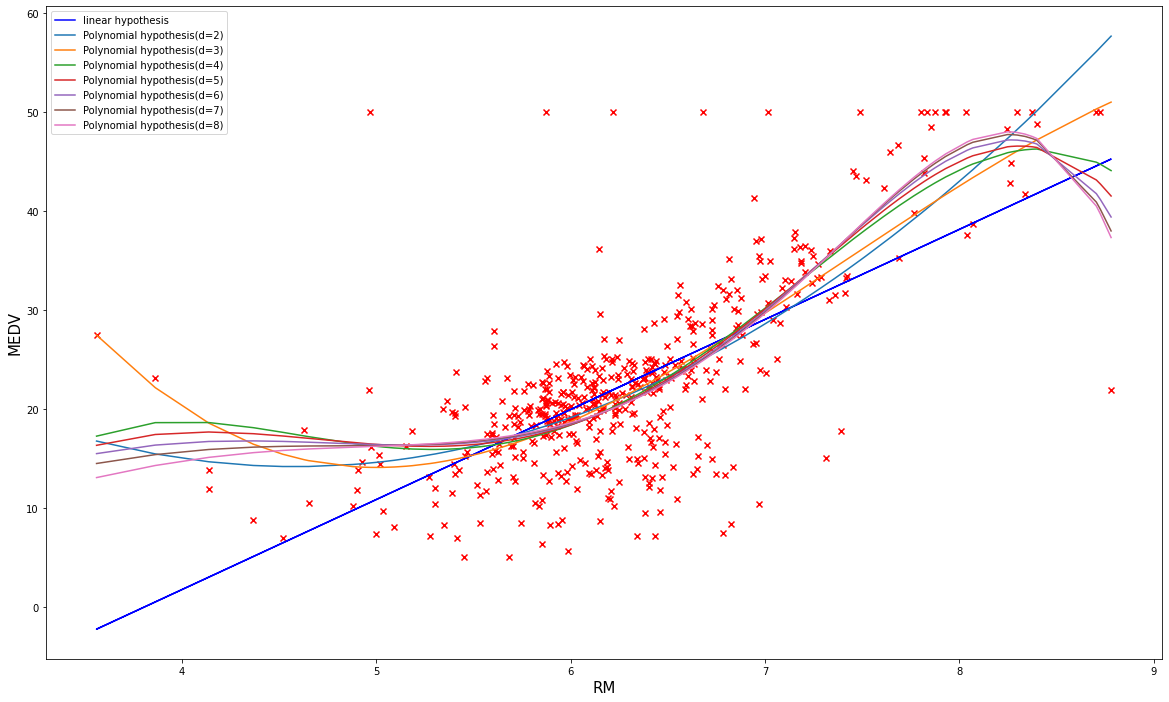

In [18]:
plt.figure(figsize=(20,12))
plt.scatter(X, Y, marker='x', c='r')
plt.plot(X.values, X_int.dot(theta_linear), label='linear hypothesis', c='b')
plt.plot(X_2, yhat_2, label='Polynomial hypothesis(d=2)')
plt.plot(X_3, yhat_3, label='Polynomial hypothesis(d=3)')
plt.plot(X_4, yhat_4, label='Polynomial hypothesis(d=4)')
plt.plot(X_5, yhat_5, label='Polynomial hypothesis(d=5)')
plt.plot(X_6, yhat_6, label='Polynomial hypothesis(d=6)')
plt.plot(X_7, yhat_7, label='Polynomial hypothesis(d=7)')
plt.plot(X_8, yhat_8, label='Polynomial hypothesis(d=8)')


plt.xlabel(feature_name, fontsize= 15)
plt.ylabel('MEDV', fontsize= 15)
plt.legend(loc = 'best')
plt.show()


In [25]:
    X = np.c_[np.ones((X.shape[0],1)), X]


ValueError: shapes (506,2) and (3,1) not aligned: 2 (dim 1) != 3 (dim 0)

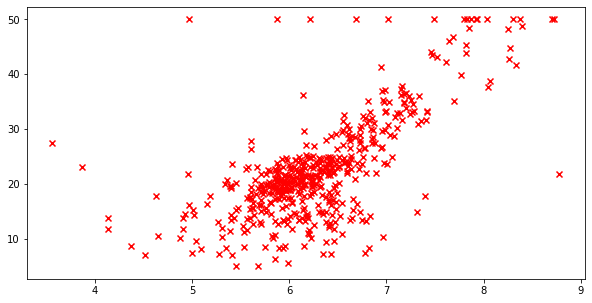

In [26]:
a = ml.reg_lin_normal_equation(X, Y)
ml.plot_linear_hypothesis_with_data(X,Y, a)